# hypothesis testing

### Generating a permutation sample

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Visualizing permutation sampling

In [4]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/129cba08c45749a82701fbe02180c5b69eb9adaf/sheffield_weather_station.csv', header=8, delim_whitespace=True)
df.head(10)

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---
5,1883,6,17.7,9.3,0,66.2,---
6,1883,7,18.8,10.5,0,77.6,---
7,1883,8,19.8,10.9,0,32.5,---
8,1883,9,16.8,10.0,0,137.4,---
9,1883,10,12.7,6.4,0,102.9,---


In [5]:
rain_june = df.groupby(('yyyy','mm')).mean().loc[(slice(None),6),'rain'].values
rain_november = df.groupby(('yyyy','mm')).mean().loc[(slice(None),11),'rain'].values

C:\Users\Kajzer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.
C:\Users\Kajzer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


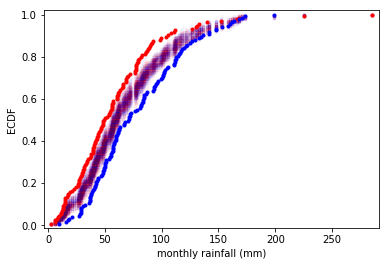

In [6]:
for _ in range(50):
  perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)
  
  x_1, y_1 = ecdf(perm_sample_1)
  x_2, y_2 = ecdf(perm_sample_2)
  
  _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
  _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)

_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)

_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')

plt.show()

### Generating permutation replicates

In [7]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    for i in range(size):
      perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
      perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

### Look before you leap: EDA before hypothesis testing

In [8]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/df6e0479c0f292ce9d2b951385f64df8e2a8e6ac/frog_tongue.csv', header=14)
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [9]:
df = df[['ID', 'impact force (mN)']]
df.columns = ['ID', 'impact_force']

In [10]:
df = df.loc[df['ID'].isin(['II', 'IV'])]

In [11]:
df.ID[df['ID'] == 'II'] = 'A'
df.ID[df['ID'] == 'IV'] = 'B'
df.head()

C:\Users\Kajzer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,impact_force
20,A,1612
21,A,605
22,A,327
23,A,946
24,A,541


In [12]:
df.impact_force /= 1000

In [13]:
df.head()

,ID,impact_force
20,A,1.612
21,A,0.605
22,A,0.327
23,A,0.946
24,A,0.541


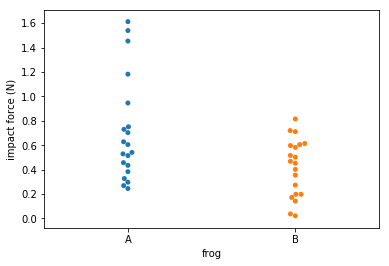

In [14]:
_ = sns.swarmplot('ID', 'impact_force', data=df)
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')
plt.show()

### Permutation test on frog data

In [15]:
force_a = df.impact_force[df.ID == 'A'].values
force_b = df.impact_force[df.ID == 'B'].values

In [16]:
def diff_of_means(data_1, data_2):
  """Difference in means of two arrays."""
  return np.mean(data_1) - np.mean(data_2)
  

In [17]:
np.random.seed(42)
empirical_diff_means = np.mean(force_a) - np.mean(force_b)

In [18]:
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, 10000)

In [19]:
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0063


### A one-sample bootstrap hypothesis test

In [20]:
np.random.seed(42)

In [21]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates
  
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    return func(np.random.choice(data, size=len(data)))

In [22]:
translated_force_b = force_b - np.mean(force_b) + 0.55

In [23]:
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

In [24]:
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000
print('p = ', p)

p =  0.0046


### A bootstrap test for identical distributions

In [25]:
np.random.seed(42)

In [26]:
empirical_diff_means = diff_of_means(force_a, force_b)

In [27]:
forces_concat = np.concatenate((force_a, force_b))
bs_replicates = np.empty(10000)

In [28]:
for i in range(10000):
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

In [29]:
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0055


### A two-sample bootstrap hypothesis test for difference of means

In [30]:
np.random.seed(42)

In [31]:
mean_force = np.mean(forces_concat)

In [32]:
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

In [33]:
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

In [34]:
bs_replicates = bs_replicates_a - bs_replicates_b

In [35]:
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0043
